팀별/선수별/투타별 MVP 상황 EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

batter = pd.read_csv('./data/batter_dataset.csv', encoding='utf-8-sig')
pitcher = pd.read_csv('./data/pitcher_dataset.csv', encoding='utf-8-sig')

In [2]:
batter.head()

,이름,연도,소속,WAR,G,타석,타수,득점,안타,2타,...,희비,타율,출루,장타,OPS,wOBA,wRC+,홀더,우승,y
0,백인천,1982,MBC,5.88,72,298,250,55,103,23,...,3,0.412,0.497,0.740,1.237,0.528,227.0,5.0,0.0,0.0
1,윤동균,1982,OB,4.13,77,334,284,54,97,20,...,4,0.342,0.428,0.532,0.960,0.430,164.6,0.0,1.0,0.0
2,이만수,1982,삼성,4.12,78,322,270,46,78,16,...,1,0.289,0.399,0.500,0.899,0.405,147.6,0.0,0.0,0.0
3,김봉연,1982,해태,3.68,74,304,269,55,89,14,...,1,0.331,0.405,0.636,1.040,0.453,180.5,2.0,0.0,0.0
4,김우열,1982,OB,3.46,62,255,210,43,65,8,...,1,0.310,0.428,0.533,0.961,0.426,161.9,0.0,1.0,0.0


In [3]:
pitcher.head()

,이름,연도,소속,WAR,출장,완투,완봉,선발,승,패,...,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,홀더,우승,y
0,박철순,1982,OB,9.54,36,15,2,19,24,4,...,0,4,1.84,2.82,0.97,211.2,137.8,3.0,1.0,1.0
1,황규봉,1982,삼성,8.62,47,8,2,16,15,11,...,1,4,2.47,2.67,1.00,160.6,148.5,1.0,0.0,0.0
2,노상수,1982,롯데,7.05,44,12,2,20,14,19,...,2,4,2.94,3.03,1.18,134.9,131.3,1.0,0.0,0.0
3,하기룡,1982,MBC,6.78,43,7,4,16,13,10,...,2,6,2.30,2.95,1.11,172.3,134.4,0.0,0.0,0.0
4,권영호,1982,삼성,5.12,32,6,3,21,15,5,...,1,1,2.37,3.91,1.07,167.5,101.3,0.0,0.0,0.0


## 팀별 MVP 수

In [4]:
mvp_team_b = batter.groupby('소속').sum()['y'].reset_index()
mvp_team_p = pitcher.groupby('소속').sum()['y'].reset_index()

mvp_team_b

,소속,y
0,KIA,0.0
1,KT,1.0
2,LG,1.0
3,MBC,0.0
4,NC,1.0
5,OB,2.0
6,SK,0.0
7,SSG,0.0
8,넥센,3.0
9,두산,1.0


In [5]:
mvp_team_p

,소속,y
0,KIA,2.0
1,KT,0.0
2,LG,0.0
3,MBC,0.0
4,NC,0.0
5,OB,1.0
6,SK,1.0
7,넥센,0.0
8,두산,4.0
9,롯데,2.0


In [6]:
import matplotlib as mpl

mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False

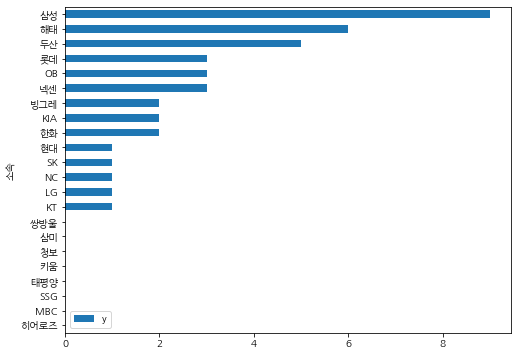

In [7]:
mvp_team = pd.concat([mvp_team_b, mvp_team_p]).groupby('소속').sum()
mvp_team.sort_values(by='y', ascending=True).plot.barh(figsize=(8, 6))
plt.show()

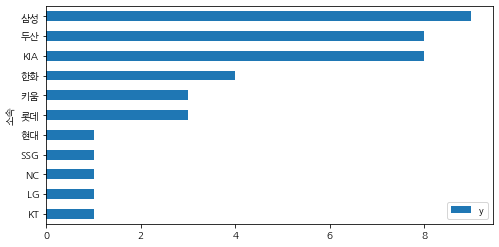

In [8]:
mvp_team_2 = mvp_team.reset_index()
mvp_team_2 = mvp_team_2.replace({'OB':'두산', '빙그레':'한화', '넥센':'키움', '히어로즈':'키움', 'MBC':'LG', '삼미':'현대', '청보':'현대', '태평양':'현대', '해태':'KIA', '쌍방울':'SSG', 'SK':'SSG'})
mvp_team_2 = mvp_team_2.groupby('소속').sum()
mvp_team_2.sort_values(by='y', ascending=True).plot.barh(figsize=(8, 4))
plt.show()

In [9]:
mvp_team_2.sum()

y    40.0
dtype: float64

우승팀과 MVP의 연관성?

In [10]:
# 우승팀 소속 타자 MVP
batter[(batter['우승']==1)&(batter['y']==1)]

,이름,연도,소속,WAR,G,타석,타수,득점,안타,2타,...,희비,타율,출루,장타,OPS,wOBA,wRC+,홀더,우승,y
64,김성한,1988,해태,5.14,104,457,404,72,131,12,...,7,0.324,0.382,0.577,0.959,0.424,166.6,4.0,1.0,1.0
139,김상호,1995,OB,4.27,126,565,504,79,137,23,...,6,0.272,0.335,0.474,0.809,0.359,133.4,2.0,1.0,1.0
180,박경완,2000,현대,7.47,130,517,408,83,115,16,...,4,0.282,0.419,0.615,1.034,0.432,162.6,1.0,1.0,1.0
200,이승엽,2002,삼성,8.96,133,617,511,123,165,42,...,2,0.323,0.436,0.689,1.125,0.472,198.5,4.0,1.0,1.0


In [11]:
# 우승팀 소속이 아닌 타자 MVP
batter[(batter['우승']==0)&(batter['y']==1)]

,이름,연도,소속,WAR,G,타석,타수,득점,안타,2타,...,희비,타율,출루,장타,OPS,wOBA,wRC+,홀더,우승,y
11,이만수,1983,삼성,6.05,98,410,357,53,105,12,...,2,0.294,0.378,0.555,0.932,0.418,170.3,2.0,0.0,1.0
32,김성한,1985,해태,5.43,105,455,400,66,133,29,...,6,0.333,0.395,0.575,0.970,0.433,176.6,3.0,0.0,1.0
52,장효조,1987,삼성,4.63,88,335,284,51,110,16,...,6,0.387,0.461,0.493,0.954,0.444,181.3,2.0,0.0,1.0
90,장종훈,1991,빙그레,8.79,126,558,464,104,160,24,...,3,0.345,0.450,0.640,1.090,0.482,204.2,5.0,0.0,1.0
100,장종훈,1992,빙그레,7.74,125,556,431,106,129,28,...,6,0.299,0.446,0.659,1.105,0.469,188.2,4.0,0.0,1.0
111,김성래,1993,삼성,6.30,124,521,436,64,131,18,...,9,0.300,0.395,0.544,0.939,0.428,183.0,2.0,0.0,1.0
120,이종범,1994,해태,11.77,124,561,499,113,196,27,...,4,0.393,0.452,0.581,1.033,0.462,198.3,5.0,0.0,1.0
154,이승엽,1997,삼성,6.78,126,577,517,96,170,37,...,4,0.329,0.391,0.598,0.988,0.432,172.3,3.0,0.0,1.0
162,우즈,1998,OB,6.38,126,521,452,77,138,14,...,2,0.305,0.394,0.619,1.013,0.434,181.2,2.0,0.0,1.0
170,이승엽,1999,삼성,8.91,132,614,486,128,157,33,...,4,0.323,0.458,0.733,1.190,0.486,191.8,5.0,0.0,1.0


In [12]:
# 우승팀 소속 투수 MVP
pitcher[(pitcher['우승']==1)&(pitcher['y']==1)]

,이름,연도,소속,WAR,출장,완투,완봉,선발,승,패,...,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,홀더,우승,y
0,박철순,1982,OB,9.54,36,15,2,19,24,4,...,0,4,1.84,2.82,0.97,211.2,137.8,3.0,1.0,1.0
20,최동원,1984,롯데,9.72,51,14,1,20,27,13,...,0,3,2.40,2.25,1.04,135.4,144.6,2.0,1.0,1.0
40,선동열,1986,해태,14.89,39,19,8,22,24,6,...,2,3,0.99,1.16,0.78,307.1,262.7,3.0,1.0,1.0
70,선동열,1989,해태,10.52,36,8,6,12,21,3,...,1,4,1.17,1.39,0.77,312.8,264.0,4.0,1.0,1.0
261,김광현,2008,SK,5.43,27,1,1,27,16,4,...,0,3,2.39,3.21,1.17,169.8,126.6,2.0,1.0,1.0
341,니퍼트,2016,두산,5.97,28,1,1,27,22,3,...,0,8,2.95,4.44,1.24,173.1,113.2,3.0,1.0,1.0
357,양현종,2017,KIA,4.56,31,1,0,31,20,6,...,0,14,3.44,3.94,1.31,144.2,126.8,1.0,1.0,1.0
371,린드블럼,2019,두산,6.86,30,0,0,30,20,3,...,0,7,2.50,2.87,1.00,164.4,141.5,3.0,1.0,1.0


In [13]:
# 우승팀 소속이 아닌 투수 MVP
pitcher[(pitcher['우승']==0)&(pitcher['y']==1)]

,이름,연도,소속,WAR,출장,완투,완봉,선발,승,패,...,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,홀더,우승,y
80,선동열,1990,해태,11.06,35,8,6,16,22,6,...,0,5,1.13,1.55,0.90,335.8,246.0,4.0,0.0,1.0
140,구대성,1996,한화,8.20,55,1,0,2,18,3,...,0,2,1.88,1.46,0.76,194.3,250.4,3.0,0.0,1.0
221,배영수,2004,삼성,6.54,35,4,2,27,17,2,...,1,13,2.61,3.17,1.25,166.3,136.9,2.0,0.0,1.0
232,손민한,2005,롯데,5.84,28,1,0,26,18,7,...,0,4,2.46,3.14,1.11,167.4,131.1,2.0,0.0,1.0
240,류현진,2006,한화,7.78,30,6,1,28,18,6,...,0,6,2.23,2.15,1.05,168.0,174.6,3.0,0.0,1.0
250,리오스,2007,두산,8.15,33,6,4,33,22,5,...,0,5,2.07,2.94,1.06,186.8,131.5,3.0,0.0,1.0
290,윤석민,2011,KIA,6.62,27,3,3,25,17,5,...,1,2,2.45,2.75,1.05,168.4,150.3,4.0,0.0,1.0
390,미란다,2021,두산,7.09,28,1,1,28,14,5,...,1,7,2.33,2.67,1.14,185.0,161.1,2.0,0.0,1.0


## 타자 MVP의 평균/최대/최소 \~

In [14]:
# 평균 타율, 홈런, 타점, WAR, 홀더
batter[batter['y']==1][['타율', '홈런', '타점', 'WAR', '홀더']].mean()

타율       0.325292
홈런      34.625000
타점     106.333333
WAR      7.235417
홀더       3.250000
dtype: float64

In [15]:
batter[batter['y']==1][['타율', '홈런', '타점', 'WAR', '홀더']].min()

타율      0.272
홈런      2.000
타점     58.000
WAR     4.270
홀더      1.000
dtype: float64

In [16]:
batter[batter['y']==1][['타율', '홈런', '타점', 'WAR', '홀더']].max()

타율       0.393
홈런      56.000
타점     144.000
WAR     11.770
홀더       7.000
dtype: float64

In [17]:
# 홈런 두 개로 MVP를 받은 타자
batter[(batter['y']==1)&(batter['홈런']==2)]

,이름,연도,소속,WAR,G,타석,타수,득점,안타,2타,...,희비,타율,출루,장타,OPS,wOBA,wRC+,홀더,우승,y
52,장효조,1987,삼성,4.63,88,335,284,51,110,16,...,6,0.387,0.461,0.493,0.954,0.444,181.3,2.0,0.0,1.0


In [18]:
# 타이틀 한 개로 MVP를 받은 타자
batter[(batter['y']==1)&(batter['홀더']==1)]

,이름,연도,소속,WAR,G,타석,타수,득점,안타,2타,...,희비,타율,출루,장타,OPS,wOBA,wRC+,홀더,우승,y
180,박경완,2000,현대,7.47,130,517,408,83,115,16,...,4,0.282,0.419,0.615,1.034,0.432,162.6,1.0,1.0,1.0
194,이승엽,2001,삼성,5.52,127,574,463,101,128,31,...,2,0.276,0.412,0.605,1.017,0.434,155.1,1.0,0.0,1.0


둘 다 홈런왕

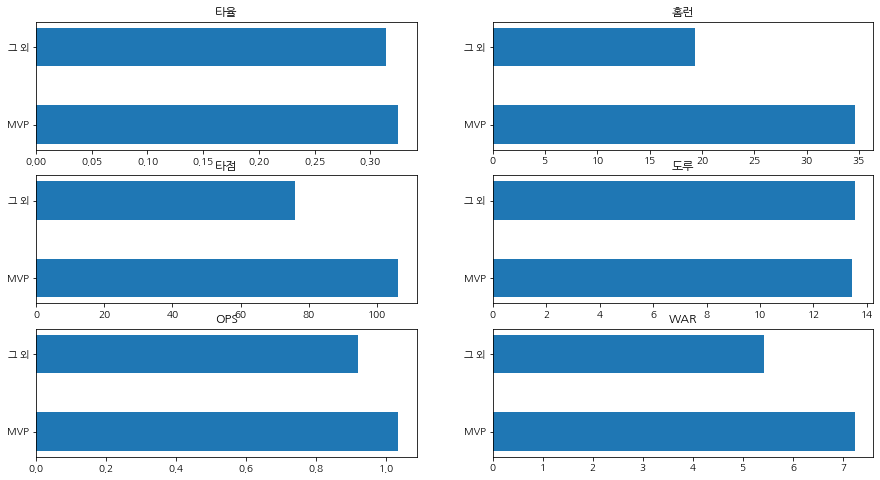

In [19]:
# MVP를 제외한 연도별 WAR 상위 9명의 평균과 비교
batter_mvp = batter[batter['y']==1]
batter_not_mvp = batter[batter['y']==0]

titles = ['타율', '홈런', '타점', '도루', 'OPS', 'WAR']

plt.figure(figsize=(15, 8))
for i in range(6):
    plt.subplot(3, 2, (i+1))
    plt.barh(['MVP', '그 외'], [batter_mvp[titles[i]].mean(), batter_not_mvp[titles[i]].mean()], height=0.5)
    plt.title(titles[i])
plt.show()

## 투수 MVP의 평균/최대/최소 \~

In [20]:
# 평균 ERA, 이닝, 삼진, 승, 승률, WAR, 홀더
pitcher[pitcher['y']==1][['ERA', '이닝', '삼진', '승', 'WAR', '홀더']].mean()

ERA      2.177500
이닝     195.200000
삼진     172.312500
승       20.000000
WAR      8.048125
홀더       2.750000
dtype: float64

In [21]:
pitcher[pitcher['y']==1][['ERA', '이닝', '삼진', '승', 'WAR', '홀더']].min()

ERA      0.99
이닝     139.00
삼진     105.00
승       14.00
WAR      4.56
홀더       1.00
dtype: float64

In [22]:
pitcher[pitcher['y']==1][['ERA', '이닝', '삼진', '승', 'WAR', '홀더']].max()

ERA      3.44
이닝     284.20
삼진     225.00
승       27.00
WAR     14.89
홀더       4.00
dtype: float64

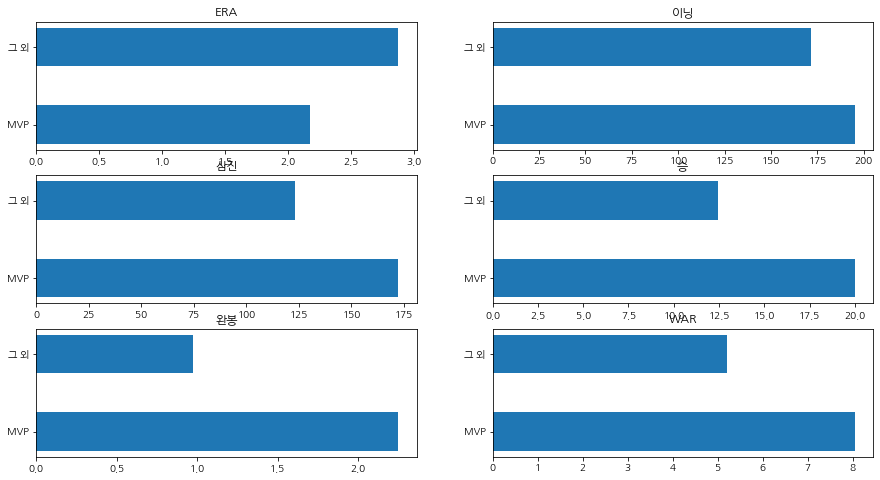

In [23]:
# MVP를 제외한 연도별 WAR 상위 9명의 평균과 비교
pitcher_mvp = pitcher[pitcher['y']==1]
pitcher_not_mvp = pitcher[pitcher['y']==0]

titles = ['ERA', '이닝', '삼진', '승', '완봉', 'WAR']

plt.figure(figsize=(15, 8))
for i in range(6):
    plt.subplot(3, 2, (i+1))
    plt.barh(['MVP', '그 외'], [pitcher_mvp[titles[i]].mean(), pitcher_not_mvp[titles[i]].mean()], height=0.5)
    plt.title(titles[i])
plt.show()

## 투타 WAR 비교

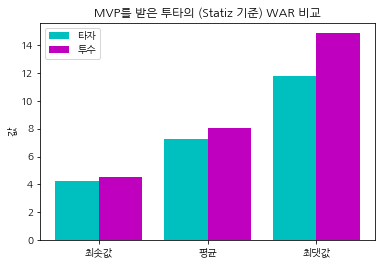

In [24]:
index = np.arange(3)

war_b = [batter_mvp['WAR'].min(), batter_mvp['WAR'].mean(), batter_mvp['WAR'].max()]
war_p = [pitcher_mvp['WAR'].min(), pitcher_mvp['WAR'].mean(), pitcher_mvp['WAR'].max()]

barWidth = 0.4
plt.bar(index, war_b, color='c', align='edge', width=barWidth, label='타자')
plt.bar(index+barWidth, war_p, color='m', align='edge', width=barWidth, label='투수')

plt.xticks(index+barWidth, ['최솟값', '평균', '최댓값'])
plt.legend()
plt.ylabel('값')
plt.title('MVP를 받은 투타의 (Statiz 기준) WAR 비교')
plt.show()

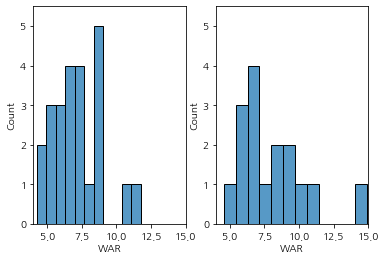

In [36]:
fig, axes = plt.subplots(1, 2)
sns.histplot(data=batter_mvp, x='WAR', ax=axes[0], bins=11)
axes[0].set_xlim(4, 15)
axes[0].set_ylim(0, 5.5)

sns.histplot(data=pitcher_mvp, x='WAR', ax=axes[1], bins=12)
axes[1].set_xlim(4, 15)
axes[1].set_ylim(0, 5.5)
plt.show()

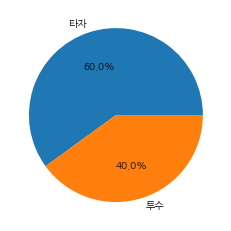

In [39]:
plt.pie([len(batter_mvp), len(pitcher_mvp)], labels=['타자', '투수'], autopct='%.1f%%')
plt.show()

비교적 타자가 투수에 비해 MVP를 받기가 쉬우며 실제로 그 비율도 타자:투수가 6:4로 높게 나온다.